### Prática de detecção de faces da Liga Acadêmica de Imagens Médicas e Visão Computacional
**O que você vai precisar?**
  - Uma foto sua ou da internet com o rosto de uma ou mais pessoas. A foto precisa ser frontal, com uma iluminação legal. 

**Importaremos três bibliotecas do Python aqui!
A matplolib você ainda não conhece, mas vai entender logo o porque vamos usar ela.**

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt 
import numpy as np 

**Esse trecho de código indica que você quer importar arquivos do seu computador**

In [ ]:
from google.colab import files
importados = files.upload()
print("Arquivos importados:")
print(*importados, sep="\n")

Saving pessoas.jpg to pessoas (1).jpg
Arquivos importados:
pessoas.jpg


**Aqui, estamos passando o nosso arquivo para uma variável.
Se o nome do arquivo que você upou for _umdoistres.png_, isso deverá ser colocado entre os parênteses. Exemplo: ("umdoistres.png").**

In [ ]:
imagem = cv.imread("pessoas.jpg")

In [ ]:
imagem = cv.imread("girl.jpg")

**Na linguagem de programação Python, a biblioteca OpenCV usa a biblioteca Numpy; por isso, as imagens são lidas como um array no tipo da biblioteca. Essa informação é apenas uma curiosidade.**

In [ ]:
type(imagem)

numpy.ndarray

**Quando estamos trabalhando com OpenCV no próprio computador, conseguimos mostrar as imagens utilizando com o seguinte método:**


In [ ]:
cv.imshow("Nome da janela", imagem)

DisabledFunctionError: ignored

**Porém, tal comando não executa em notebooks... Para contornar esse problema, iremos ler as imagens utilizando o Matplotlib. Acompanhem a seguinte função construída:**

In [ ]:
def mostrar_imagem(imagem):
  imagem_rgb = cv.cvtColor(imagem, cv.COLOR_BGR2RGB)
  plt.imshow(imagem_rgb)

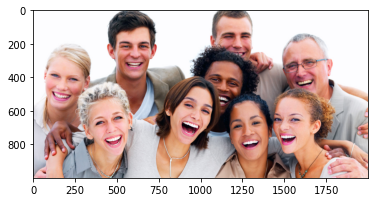

In [ ]:
mostrar_imagem(imagem)

**Legal, né? Mas você lembra que para usar o algoritmo Viola-Jones e as Haar-Features, as imagens precisam estar em preto em branco? Vamos converter pra b&w então!**

In [ ]:
imagem_cinza = cv.cvtColor(imagem, cv.COLOR_BGR2GRAY)

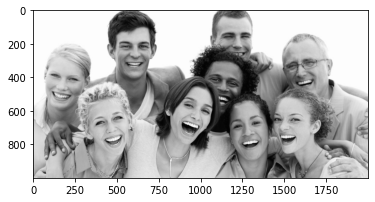

In [ ]:
mostrar_imagem(imagem_cinza)

**Aqui, vamos pegar as features de haar que a biblioteca OpenCV disponibiliza para a gente e fazer um classificador que detecta se na imagem existem rostos ou não**

In [ ]:
features_haar = "haarcascade_frontalface_alt2.xml"
caminho = f"{cv.haarcascades}/{features_haar}"
classificador = cv.CascadeClassifier(caminho)

faces = classificador.detectMultiScale(imagem_cinza)
imagem_copia = np.array(imagem)

**Desenhamos um retangulo em volta de cada um dos nos rostos que foram encontrados....**

In [ ]:
for x,y,w,h in faces:
  cv.rectangle(imagem_copia, (x, y), (x+w, y+h), (0,255,0), 2)

**Resultado final**

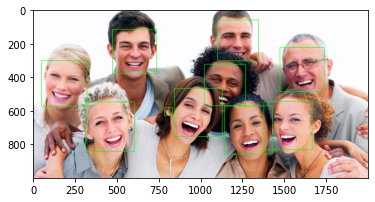

In [ ]:
mostrar_imagem(imagem_copia)